# SimpleRNN
- 1. 시계열 데이터 정의
- 2. 학습 데이터 생성
- 3. RNN 모델 구축 및 학습

## 1. 시계열 데이터 y = 0.5sini(x)-cos(x/2) 정의

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras import Sequential

In [2]:
# data 생성

x = np.arange(0, 100, 0.1) # 1000개 시계열 데이터
y = np.sin(2*x) + np.cos(x)

seq_data = y.reshape(-1,1)
           # RNN 입력에 필수적인 (batch size, time steps, input_dim)
           # 3차원 텐서 형태의 입력 데이터로 쉽게 만들기 위해서
           # reshape(-1,1) 사용하여 (1000,1) 행렬로 바꾸어줌

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[1.        ]
 [1.1936735 ]
 [1.36948492]
 [1.51997896]
 [1.63841708]]


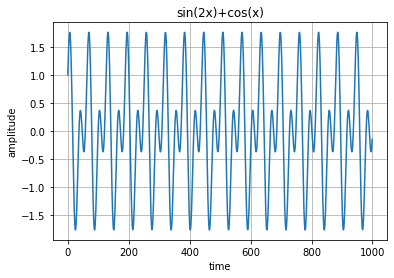

In [3]:
plt.grid()
plt.title('sin(2x)+cos(x)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

## 2. 입력 데이터 X, 정답 데이터 Y 생성

In [4]:
def seq2dataset(seq, window, horizon):

    X = [] # 입력 데이터를 저장하는 list
    Y = [] # 정답 데이터를 저장하는 list

    for i in range(len(seq)-(window+horizon)+1):

        x = seq[i:(i+window)]
        # 슬라이싱 이용하여 [[..],[..],..] 형상으로 x데이터 생성함
        y = (seq[i+window+horizon-1])

        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)
            # [[..],[..],..]은 2차원 행렬인데, np.array(X) 통해서
            # (batch size, time steps, input dims) 형상을 가지는 3차원 텐서로 변환되어 리턴.

In [5]:
w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


## 3. 트레이닝 데이터 / 테스트 데이터 분리

In [6]:
split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


## 4. SimpleRNN 모델 구축

In [7]:
model = Sequential()

#model.add(SimpleRNN(units=128, activation='tanh',input_shape=x_train[0].shape))

model.add(SimpleRNN(units=128, activation='tanh',input_shape=(20,1)))
            # SImpleRNN 계층에 tanh를 활성화 함수로 가지는 노드 수 128개

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


## 5. SimpleRNN 모델 컴파일 및 학습

In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [9]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 0.2138 - mae: 0.2556 - val_loss: 0.0095 - val_mae: 0.0802
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0027 - mae: 0.0398 - val_loss: 7.6098e-04 - val_mae: 0.0217
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 4.0795e-04 - mae: 0.0160 - val_loss: 1.9134e-04 - val_mae: 0.0112
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 1.1596e-04 - mae: 0.0085 - val_loss: 8.2143e-05 - val_mae: 0.0070
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 5.8695e-05 - mae: 0.0060 - val_loss: 3.8195e-05 - val_mae: 0.0050
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 3.4898e-05 - mae: 0.0048 - val_loss: 2.8277e-05 - val_mae: 0.0042
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 2.6339e-05 - mae: 0.0040 - val_loss: 2.3149e-05 - val_mae: 0.0040
Epoch 8/100
25/25 [===================

25/25 [==============================] - 0s 5ms/step - loss: 1.6760e-05 - mae: 0.0033 - val_loss: 9.6882e-06 - val_mae: 0.0024
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 5.6655e-05 - mae: 0.0055 - val_loss: 2.4410e-04 - val_mae: 0.0129
Epoch 61/100
25/25 [==============================] - 0s 5ms/step - loss: 1.7932e-04 - mae: 0.0110 - val_loss: 1.1382e-04 - val_mae: 0.0082
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 2.2087e-04 - mae: 0.0118 - val_loss: 1.0410e-04 - val_mae: 0.0086
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 1.4900e-04 - mae: 0.0099 - val_loss: 3.0806e-04 - val_mae: 0.0142
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 5.0115e-04 - mae: 0.0184 - val_loss: 0.0018 - val_mae: 0.0368
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 8.9794e-04 - mae: 0.0240 - val_loss: 0.0016 - val_mae: 0.0345
Epoch 66/100
25/25 [=====================

## 6. 정확도 및 손실 함수

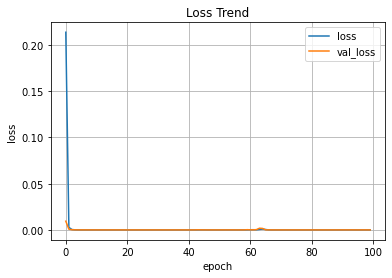

In [10]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')

plt.show()

In [11]:
pred = model.predict(x_test)

print(pred.shape)

(196, 1)


In [12]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size=5)

print('\n\nrandom idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [189  31 120 110 122] 

pred  =  [-0.29126263 -0.72416437  0.25649196 -0.40008333  0.08040171]
label =  [-0.29520266 -0.72081678  0.25260954 -0.40275968  0.0764517 ]


random idx =  [ 59 102 165  28  19] 

pred  =  [ 0.09680369 -1.7198505  -1.7094262   0.1547469   1.7609222 ]
label =  [ 0.09283707 -1.72269165 -1.7124255   0.15640265  1.7595613 ]


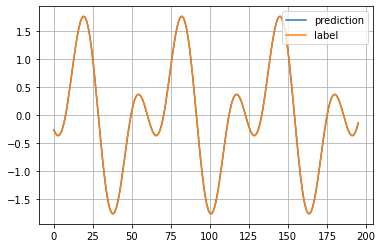

In [13]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')

plt.show()